# Introduction to Machine Learning, Project 2
## Heorhii Lopatin

## 1. Exploration (7 pts.)


### (a) Check how many observations and variables the loaded training and test data contain. Take a look at the types of variables and, if you deem it appropriate, make appropriate conversions before further analysis. Make sure the data are complete.

In [30]:
# !pip3 install seaborn
# !pip3 install scikit-learn
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install matplotlib
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


First we have to load the datasets and look at their shapes

In [31]:
X = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')
X_final_test = pd.read_csv('X_test.csv')

print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("X_final_test shape: ", X_final_test.shape)



X shape:  (3794, 9821)
y shape:  (3794, 2)
X_final_test shape:  (670, 9821)


Next make sure that all columns don't have the object type and don't contain any values.

In [11]:
print("X column types", X.dtypes.value_counts())
print("--------------------")
print("y column types", y.dtypes.value_counts())
print("--------------------")
print("X_final_test column types", X_final_test.dtypes.value_counts())
print("--------------------")
print("X null values: ", X.isnull().values.any())
print("y null values: ", y.isnull().values.any())
print("X_final_test null values: ", X_final_test.isnull().values.any())



X column types float64    9821
Name: count, dtype: int64
--------------------
y column types int64      1
float64    1
Name: count, dtype: int64
--------------------
X_final_test column types float64    9821
Name: count, dtype: int64
--------------------
X null values:  False
y null values:  False
X_final_test null values:  False


All of the columns except for id in y are floats. We won't be needing the id for now, so might as well remove it.

In [12]:
y.columns

Index(['Id', 'Expected'], dtype='object')

In [32]:
#mlp_y is later needed for the mlp 
mlp_y = y.drop(['Id'], axis=1)
y = y['Expected']

In [30]:
X.head()

,AL627309.5,LINC01409,LINC01128,FAM41C,NOC2L,KLHL17,HES4,ISG15,AGRN,TNFRSF18,...,MT-ATP8,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC011043.1,AL592183.1,AC240274.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74448,0.0,0.0,...,0.0,2.167615,0.744480,2.286736,1.875906,0.000000,1.690351,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48304,0.0,0.0,...,0.0,1.051865,0.000000,1.051865,0.000000,0.000000,2.058083,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,2.047128,0.559338,1.945354,1.178206,0.559338,1.945354,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,2.239732,0.000000,1.334195,0.000000,0.000000,2.609056,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.673881,0.000000,2.045479,1.072841,0.000000,1.578432,0.0,0.0,0.0


We can see that some of the columns seem to contain only 0s in the beginning. We will check that there are no columns that contain nothing but 0s. If that is the case, there is absolutely no way for us to train the model to take these columns into account, so the only sensible thing we can do is remove them. If we don't there is a chance some of  those will not be 0 in the X_final_test and it may randomise the predictions.

In [33]:


total_entries = X.shape[0]
total_zeros = list(filter(lambda x: X[x][X[x] == 0].count() == total_entries, X.columns))


print("number of columns that are only 0 is", len(total_zeros))


number of columns that are only 0 is 821


In [34]:
X.drop(columns=total_zeros, inplace=True)
X_final_test.drop(columns=total_zeros, inplace=True)

### (b) Examine the empirical distribution of the explanatory variable (present some basic statistics, include a histogram or density estimator plot in your analysis).

The description and the histogram of the explanatory variable is as follows:

In [7]:
y.describe()

count    3794.000000
mean        1.210610
std         0.986880
min         0.000000
25%         0.159644
50%         1.333982
75%         2.155959
max         3.265285
Name: Expected, dtype: float64

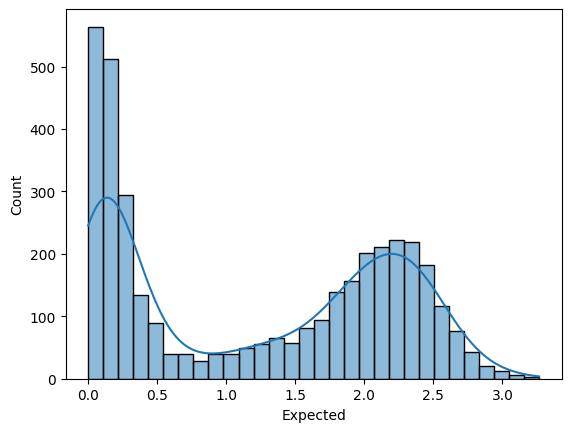

In [34]:
sns.histplot(y, bins=30, kde=True)
plt.show()

### (c) Select 250 explanatory variables that are most correlated with the explanatory variable. Count the correlation for each pair of these variables. Illustrate the result with a heat-map.

In [35]:
correlations = X.corrwith(y)
top_correlations_names = correlations.abs().sort_values(ascending=False).head(250).index

for name in top_correlations_names:
    print(name, correlations[name])

RPL3 -0.6290623592274105
S100A9 0.6016330906664007
RPL10 -0.5974320435164462
RPS27 -0.5928941520195847
LTB -0.5894511061120095
RPS18 -0.5871636044713484
RPS27A -0.5814871352382692
RPS4X -0.5702694602221166
RPS19 -0.5695833048680243
S100A8 0.5675310155067523
RPL13 -0.5637036574907078
RPS23 -0.5565550338629643
RPS3 -0.5521736252631617
RPL10A -0.5463697176227726
LYZ 0.5414294168341779
FTL 0.5360725593087199
RPS5 -0.5349127649986798
RPL9 -0.5340488636763561
RPL13A -0.5340126835329124
RPS15A -0.5337929215591048
RPL5 -0.532534193884612
RPS8 -0.5311129217020626
RPL18A -0.5285981576681268
RPL19 -0.5270680702705176
RPS3A -0.5148892259752813
RPL34 -0.5144266343395117
RPL11 -0.5125009234835092
RPS2 -0.5109481002333598
RPL18 -0.5030140885129957
RPL32 -0.5025992404807392
RPL30 -0.5025282639234298
RPL41 -0.4989924049995573
RPL17 -0.4981271455349835
RPS12 -0.49550571393811843
RPL14 -0.4918609005038525
RPS14 -0.48957087072989347
RPL7A -0.48951924381981377
RPS6 -0.48695466465407355
EEF1A1 -0.4864489044

<Axes: >

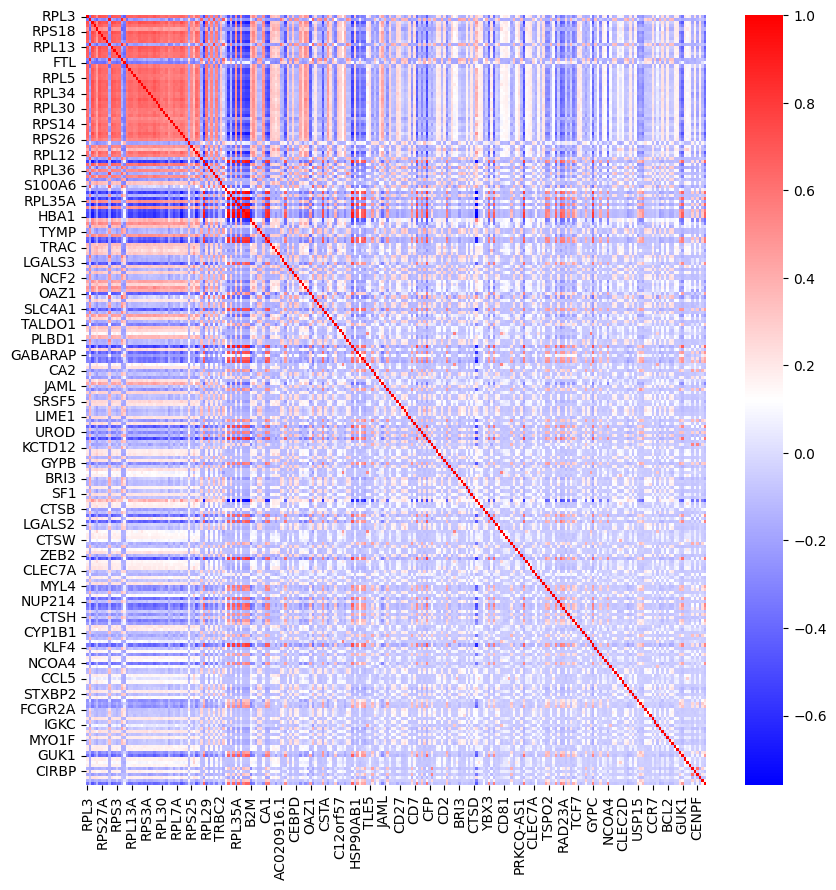

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(X[top_correlations_names].corr(), cmap  = 'bwr')

## 2nd ElasticNet (7 pts).
The first model to be trained is ElasticNet. Its special cases are
ridge regression (ridge regression) and lasso.


In [28]:

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings

### (a) Report information about the ElasticNet model, explaining the parameters it estimates, the optimised function and the hyperparameters on which it depends. For which values of the hyperparameters do we obtain a ridge regression and for which values of the lasso?

Given observations $X \in \mathbb{R}^{n\times p}$, $y \in \mathbb{R}^n$ and hyperparameters $ \lambda_1, \lambda_2 \ge 0$ the ElasticNet method optimises the expression $$L(\beta ) = \frac{1}{2n}||y - X\beta||^2_2 + \lambda_1 ||\beta||_1 + \lambda_2 ||\beta||^2_2$$

The special cases of the methods are 
 - $\lambda_1 = 0, \lambda_2 > 0$ - Lasso regression
 - $\lambda_1 > 0, \lambda_2 = 0$ - Ridge regression
 <!-- - $\lambda_1 = 0, \lambda_2 = 0$ - The least square method  -->

 In sklearn the hyperparameters are provided with $ \textbf{alpha} \in \mathbb{R}, 0 \le \textbf{l1\_ratio} \le 1$ 

 where $\textbf{alpha} = \lambda_1 + \lambda_2, \textbf{l1\_ratio}=\frac{\lambda_1}{\lambda_1 + \lambda_2}$





### (b) Define a grid of hyperparameters, based on at least three values of each hyperparameter. Ensure that the grid includes configurations of hyperparameters from the ridge regression and lasso. Use cross-validation to select the appropriate hyperparameters (the number of subsets used in cross-validation should be decided personally, justify your choice).

A value of cv=5 was chosen due to the fact that the size of the X_final_test is about the fifth of the whole dataset, as well as the fact that 20% is the usual length chosen for the size of the test dataset. cv=5 is a value that is usually chosen, and the higher you go the more computational time/load increases. 

In [ ]:
alpha_list = [0.001,  0.1, 0.2, 0.3, 0.5, 1]
l1_ratio_list = [0, 0.2, 0.4, 0.6, 0.8, 1]
cv=5
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
param_grid = {'alpha': alpha_list, 'l1_ratio': l1_ratio_list, 'random_state' : [0], 'max_iter': [1000]}
model = ElasticNet(random_state=0)
grid = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1) 
grid.fit(X, y)





In [39]:
print("best elasticnet params:", grid.best_params_)

best elasticnet params: {'alpha': 0.2, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 0}


### (c) Report the training and validation error of the model (the result should be averaged over all subsets highlighted in the cross-validation).


A special class to calculate the results of a model

In [24]:
class MRes:
    def __init__ (self, model, X_train, y_train):
        crossval_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
        self.rmse_scores = np.sqrt(-crossval_scores)
        self.mean_rmse = np.mean(self.rmse_scores)
        self.std_rmse = np.std(self.rmse_scores)
        self.max_rmse = np.max(self.rmse_scores)
        self.min_rmse = np.min(self.rmse_scores)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        self.train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        self.res_array = np.array([self.train_rmse, self.mean_rmse, self.std_rmse, self.max_rmse, self.min_rmse])


Finally, the results of the best model

In [ ]:
best_elastic = ElasticNet(**grid.best_params_)

elastic_results = MRes(best_elastic, X, y)

In [42]:
print("ElasticNet train RMSE: ", elastic_results.train_rmse)
print("ElasticNet mean test RMSE: ", elastic_results.mean_rmse, "+-", elastic_results.std_rmse)

ElasticNet train RMSE:  0.26761669714627534
ElasticNet mean test RMSE:  0.35354337714953216 +- 0.0074208802580574005


## Random forests (8 pts)
In this part of the project, you should train a random forest model and compare its performance with the ElasticNet model created earlier.




### (a) From the many hyperparameters that characterise the random forest model, select three different ones. Define a three-dimensional grid of searched combinations of hyperparameters and, using cross-validation, select their optimal (in the context of the prediction to be made) values. The data partitioning used for cross-validation should be the same as for ElasticNet.

In [26]:
# !pip install tabulate
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from tabulate import tabulate

n_estimators, max_depth, max_features were chose since they are the most important (ig). Right now there are only two values for each parameter, but I had to test much more of them. 

In [35]:
param_grid = {
    'n_estimators': [100, 500],     
    'max_depth': [10, 18],      
    'max_features': [0.15, 'log2'],
    'random_state': [0]
}
model = RandomForestRegressor()
grid = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X, y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 18], 'max_features': [0.15, 'log2'],
                         'n_estimators': [100, 500], 'random_state': [0]},
             scoring='neg_mean_squared_error')

In [45]:
print("Best parameters:", grid.best_params_)

Best parameters: {'max_depth': 18, 'max_features': 0.15, 'n_estimators': 500, 'random_state': 0}


In [36]:
best_forest = RandomForestRegressor(**grid.best_params_)
forest_results = MRes(best_forest, X, y)

In [47]:
print("RandomForest train RMSE: ", forest_results.train_rmse)
print("RandomForest mean test RMSE: ", forest_results.mean_rmse, "+-", forest_results.std_rmse)

RandomForest train RMSE:  0.15410673153145527
RandomForest mean test RMSE:  0.3179690489724055 +- 0.01200374774713912


### (b) Make a tabular summary of the results that the methods received in cross-validation in the two models considered. (This comparison is the reason why we care to use the same split). Determine which model seems best to you (justify your choice). Include in the comparison a basic reference model that assigns any values of the explanatory variables to the arithmetic mean of the explanatory variable.

First create a dummy model

In [48]:
dummy = DummyRegressor(strategy='mean')
dummy_results = MRes(dummy, X, y)

Finally compare results of each model using tabulate

In [49]:
results = [dummy_results, elastic_results, forest_results]
model_names = ["Dummy", "ElasticNet", "RandomForest"]

headers = ["Model", "Train RMSE", "Mean Test RMSE", "Std Test RMSE", "Max Test RMSE", "Min Test RMSE"]

table = []
for i in range(len(results)):
    table.append([model_names[i]] + list(results[i].res_array))

print(tabulate(table, headers=headers, tablefmt='pretty'))

+--------------+---------------------+---------------------+-----------------------+--------------------+--------------------+
|    Model     |     Train RMSE      |   Mean Test RMSE    |     Std Test RMSE     |   Max Test RMSE    |   Min Test RMSE    |
+--------------+---------------------+---------------------+-----------------------+--------------------+--------------------+
|    Dummy     | 0.9867503137864067  | 0.9871009079983686  | 0.006736909375593557  | 0.9956402722642355 | 0.9783201700111966 |
|  ElasticNet  | 0.26761669714627534 | 0.35354337714953216 | 0.0074208802580574005 | 0.362952836277754  | 0.3438760778747556 |
| RandomForest | 0.15410673153145527 | 0.3179690489724055  |  0.01200374774713912  | 0.3332958987788571 | 0.3025918932377611 |
+--------------+---------------------+---------------------+-----------------------+--------------------+--------------------+


The random forset has proven to be the best, becauese the dataset might be just waay to complicated for a linear plane to approximate well.
The Dummy model didn't perform well, as expected.

## 4. The best solution

We will use a MLP to get the best result. The reason being that all of the previous models are reasonably simple, while I have access to a GPU and it takes signifiantly less time to train a model on a GPU, (even if the model is complicated, the GPU has enough VRAM to fit everything at the same time). The previous models are called with sklearn and therefore it doesn't seem to be possible to run them on a GPU. (I am too lazy to look for alternative methods to do that and I want to check how the MLP performs.)

In [16]:
# !pip install torch
# !pip install tqdm
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset, SubsetRandomSampler
from tqdm import tqdm
from sklearn.model_selection import KFold
# for some reason we need to have the header (something related to the conversion to a tensor probably)
y = mlp_y

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

We want to optimise the RMSE(because everyone compares their results in RMSE) but there shouldn't be any difference if we take MSE. The reason RMSE is used as a loss funciton is because it's easier to print the model results.

In [17]:
class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()

    def forward(self, y_pred, y_true):
        return torch.sqrt(torch.mean((y_pred - y_true) ** 2))

The data isn't gonna be normalised since it doesn't make much difference in our case.

In [18]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    #more complicated models do not perform better, however a choice of an activation function can be crucial
    
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(X.shape[1], 1024),
      nn.ReLU(),
      nn.Linear(1024, 256),
      nn.Tanh(),
      nn.Linear(256,1)
    )

  def forward(self, x):
    return self.layers(x)

In [19]:
#get tensors from pandas dataframes
def extract_X_y(subset):
    X_list = []
    y_list = []

    for data in subset:
        X_list.append(data[0])
        y_list.append(data[1])

    X_tensor = torch.stack(X_list)
    y_tensor = torch.stack(y_list)

    return X_tensor, y_tensor


# validate model
def vali(model, vali_loader, criterion):
    
    model.eval()
    X, y = extract_X_y(vali_loader)

    X = X.float().to(device)
    y = y.float().to(device)
    
    y_pred = model(X)
    loss = criterion(y_pred, y)
    return loss.item()


def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    layer.reset_parameters()
  
# one epoch of training
def train_epoch(model, train_loader, optimizer, criterion):
    model.train()
    train_loss = []
    for i, ( batch_x, batch_y) in tqdm(enumerate(train_loader, 0)):

      optimizer.zero_grad()

      batch_x = batch_x.float().to(device)
      batch_y = batch_y.float().to(device)
        
      outputs = model(batch_x)
        
      loss = criterion(outputs, batch_y)
      loss.backward()
      optimizer.step()
      train_loss.append(loss.item())
    return np.mean(train_loss)

def visualise(model, test_set):
    model.eval()
    X, y = extract_X_y(test_set)

    X = X.float().to(device)
    y = y.float().to(device)
    
    y_pred = model(X)
    y_pred_np = y_pred.cpu().detach().numpy()
    sns.histplot(y_pred_np, bins=30, kde=True)
    plt.show()  
    

FOLD 0
--------------------------------


759it [00:11, 64.59it/s]


Epoch 1, Training loss: 0.3899585606287355
Validation loss:  0.32164719700813293


759it [00:11, 66.95it/s]


Epoch 2, Training loss: 0.2552722163194096
Validation loss:  0.31521257758140564


759it [00:11, 66.86it/s]


Epoch 3, Training loss: 0.19750560701816136
Validation loss:  0.3076118528842926


759it [00:11, 65.29it/s]


Epoch 4, Training loss: 0.1690949371712815
Validation loss:  0.3067178726196289


759it [00:11, 68.37it/s]


Epoch 5, Training loss: 0.16104299893261612
Validation loss:  0.3064393103122711


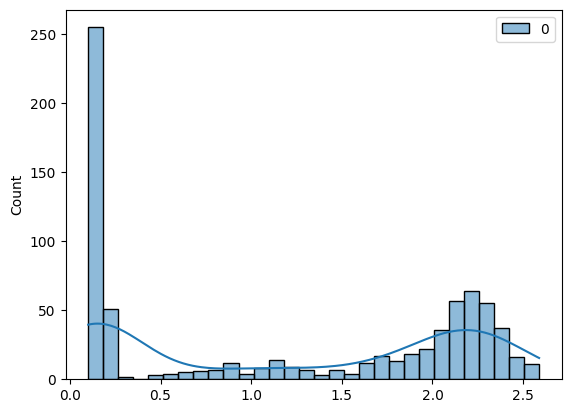

FOLD 1
--------------------------------


759it [00:10, 70.07it/s]


Epoch 1, Training loss: 0.3792107720302273
Validation loss:  0.42381954193115234


759it [00:10, 69.07it/s]


Epoch 2, Training loss: 0.2558302650858841
Validation loss:  0.3125067949295044


759it [00:10, 70.04it/s]


Epoch 3, Training loss: 0.1808160991826351
Validation loss:  0.3012402653694153


759it [00:11, 68.95it/s]


Epoch 4, Training loss: 0.14799382438704037
Validation loss:  0.30375903844833374


759it [00:11, 64.58it/s]


Epoch 5, Training loss: 0.1408029696088142
Validation loss:  0.3034076392650604


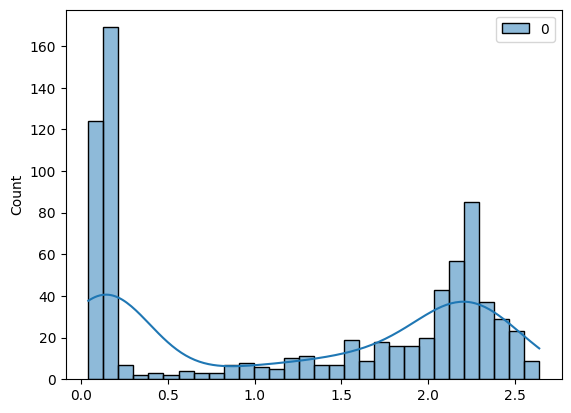

FOLD 2
--------------------------------


759it [00:10, 71.99it/s]


Epoch 1, Training loss: 0.3789752510588552
Validation loss:  0.391977459192276


759it [00:11, 65.95it/s]


Epoch 2, Training loss: 0.25498099286447873
Validation loss:  0.3039810061454773


759it [00:11, 67.50it/s]


Epoch 3, Training loss: 0.1871658063558702
Validation loss:  0.29940953850746155


759it [00:11, 68.60it/s]


Epoch 4, Training loss: 0.1611204535549455
Validation loss:  0.3002757728099823


759it [00:10, 69.28it/s]


Epoch 5, Training loss: 0.15414667910526902
Validation loss:  0.30017685890197754


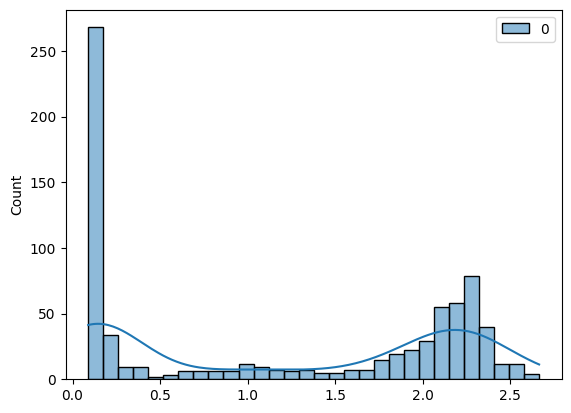

FOLD 3
--------------------------------


759it [00:11, 68.12it/s]


Epoch 1, Training loss: 0.39022763433212193
Validation loss:  0.3670770227909088


759it [00:10, 69.67it/s]


Epoch 2, Training loss: 0.25830913944187056
Validation loss:  0.3242444396018982


759it [00:11, 65.70it/s]


Epoch 3, Training loss: 0.19046831669896958
Validation loss:  0.31893637776374817


759it [00:11, 68.67it/s]


Epoch 4, Training loss: 0.1637823505619141
Validation loss:  0.3191993534564972


759it [00:10, 69.19it/s]


Epoch 5, Training loss: 0.1571320221699254
Validation loss:  0.31907176971435547


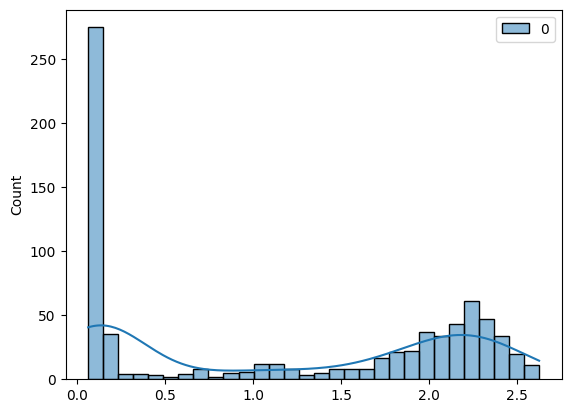

FOLD 4
--------------------------------


759it [00:11, 67.34it/s]


Epoch 1, Training loss: 0.36736372030770825
Validation loss:  0.38192397356033325


759it [00:11, 65.68it/s]


Epoch 2, Training loss: 0.24591885915342646
Validation loss:  0.3755667805671692


759it [00:11, 67.17it/s]


Epoch 3, Training loss: 0.18015314294552928
Validation loss:  0.32421448826789856


759it [00:10, 69.36it/s]


Epoch 4, Training loss: 0.1503487258415782
Validation loss:  0.3254930377006531


759it [00:10, 69.41it/s]


Epoch 5, Training loss: 0.14264452180853396
Validation loss:  0.32582464814186096


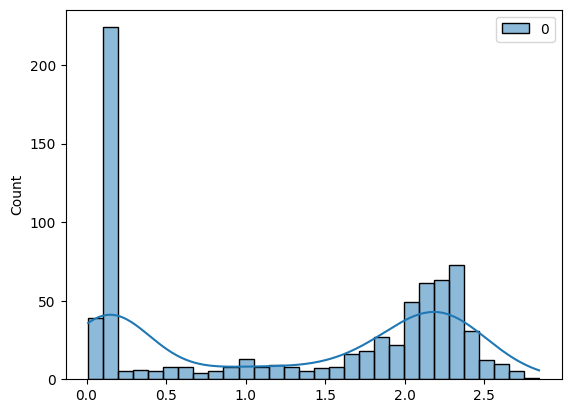

--------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 0.3064393103122711 
Fold 1: 0.3034076392650604 
Fold 2: 0.30017685890197754 
Fold 3: 0.31907176971435547 
Fold 4: 0.32582464814186096 
Average: 0.3109840452671051 +- 0.00980312808514681 


In [20]:

torch.manual_seed(0)
np.random.seed(0)

dataset = torch.utils.data.TensorDataset(torch.tensor(X.values, dtype=torch.float32), torch.tensor(y.values, dtype=torch.float32))
batch_size = 4
cv = 5
lr_first = 2e-3
lr_decay = 0.2

results = {}


kfold = KFold(n_splits=cv, shuffle=True)


for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
  assert(len(set(train_ids).intersection(set(test_ids))) == 0)
  
  print(f'FOLD {fold}')
  print('--------------------------------')


  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_subsampler)
  
  test_set = Subset(dataset, test_ids)

  model = MLP().to(device)
  model.apply(reset_weights)

  loss_fn = RMSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr = lr_first)

  for epoch in range(0,5):  
      train_loss = train_epoch(model, train_loader, optimizer, loss_fn)

      if (epoch+1) % 1 == 0:
        print(f'Epoch {epoch+1}, Training loss: {train_loss}')
        vali_loss = vali(model, test_set, loss_fn)
        results[fold] = vali_loss
        print('Validation loss: ', vali_loss)
      for g in optimizer.param_groups:
        g['lr'] = g['lr'] * lr_decay
  visualise(model, test_set)
  vali_loss = vali(model, test_set, loss_fn)
  results[fold] = vali_loss


print("--------------------")
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {cv} FOLDS')
print('--------------------------------')

for key, value in results.items():
  print(f'Fold {key}: {value} ')
  
print(f'Average: {np.mean(list(results.values()))} +- {np.std(list(results.values()))} ')


The MLP performs just a bit better than random first, which goes to show just how OP the random forest is. The only thing left is to generate the results

In [41]:
final_tensor = torch.tensor(X_final_test.values, dtype=torch.float32).to(device)

predictions = model(final_tensor).detach().cpu().numpy()


#replace <0 values with 0
predictions[predictions < 0] = 0
predictions = pd.DataFrame(predictions, columns=['Expected'])


predictions.to_csv('456366_predykcja.csv', index=True, index_label='Id')

In [38]:
best_forest.fit(X, y['Expected'])
forest_predictions = best_forest.predict(X_final_test)
forest_predictions = pd.DataFrame(forest_predictions, columns=['Expected'])

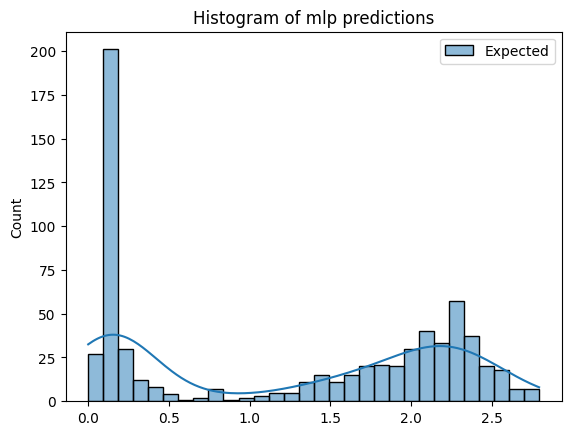

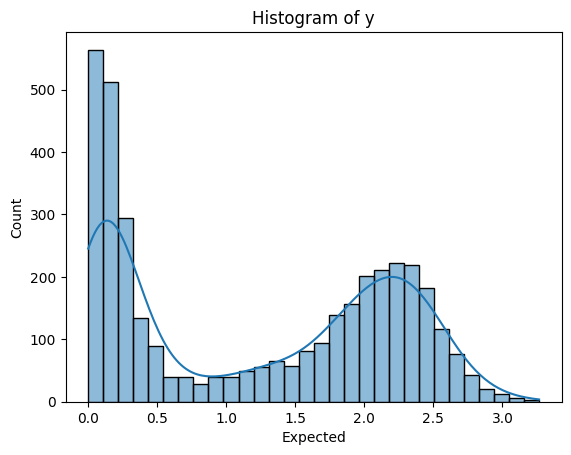

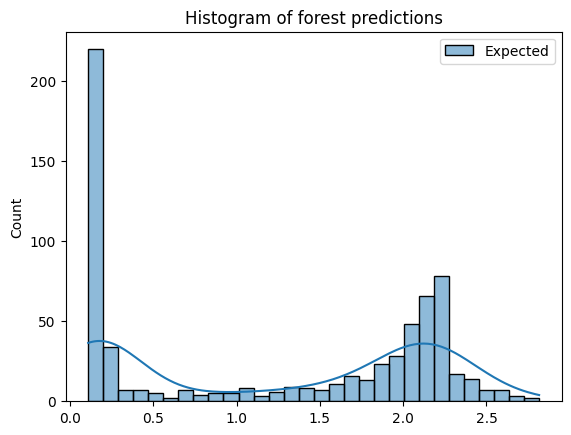

In [45]:
sns.histplot(predictions, bins=30, kde=True)
plt.title("Histogram of mlp predictions")

plt.show()

sns.histplot(y['Expected'], bins=30, kde=True)
plt.title("Histogram of y")
plt.show()

sns.histplot(forest_predictions, bins=30, kde=True)
plt.title("Histogram of forest predictions")
plt.show()



This last check is to make sure nothing totally stupid has been done. We check if the distribution of predictions is the same as y, visually. The MLP does in fact seem to perform better than the random forest, so all good.